In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
def score_model(model, x, y, n_splits=10, n_repeats=10):
    scoring = 'neg_root_mean_squared_error'
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=seed)
    scores = cross_val_score(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

In [3]:
def plot_scores_box_plot(scores, repeats, n_splits):
    plt.figure(figsize=(15,8))
    plt.boxplot(scores.reshape((repeats, n_splits)), labels=[str(r) for r in range(1, repeats+1)], showmeans=True)
    plt.ylabel('RMSE', labelpad=20, fontsize=15)
    plt.xlabel('Repeats', labelpad=20, fontsize=15)
    plt.show()

In [4]:
def plot_predictions(linreg_model, df, index, x, y):
    d = df['Data/Hora'].values
    test_series = pd.DataFrame({'ccs28':y}, index=pd.to_datetime(d))
    pred_series = linreg_model.predict(scaler.transform(x))
    pred_series = pd.DataFrame({'ccs28-pred' : pred_series}, index=pd.to_datetime(d))

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

    test_series.plot(ax=ax)
    ax.axvline(test_series.index[index], color='r') # end of train dataset
    pred_series[index:].plot(ax=ax)
    ax.grid(which="both")
    ax.legend(["train and test series", "end of train series", 'predicted'], loc="upper left")
    # ax.set_xlabel('Period', labelpad=20, fontsize=15)
    ax.set_ylabel('Compressive Strength - MPa', labelpad=20, fontsize=15)
    plt.show()

In [5]:
df = pd.read_csv("../../../../data/interim/partner_iii/Dati CADD 2020-2022_with_fillna.csv")

In [6]:
seed = 47
scaler = StandardScaler()
repeats = 10
n_splits = 10
linreg_model = LinearRegression()
pipeline = Pipeline([('transformer', scaler), ('estimator', linreg_model)])

In [7]:
linreg_model = LinearRegression()

In [8]:
y = df.pop("28d compressive strength (MPa)").values
x = df.values

<h2> Repeated KFold Cross validation</h2>

In [9]:
cv = RepeatedKFold(n_splits=n_splits, n_repeats=repeats, random_state=seed)
scores = cross_val_score(
    pipeline, x, y, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1
)
scores = np.abs(scores)
print("RMSE: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

RMSE: 5.165 (0.490)


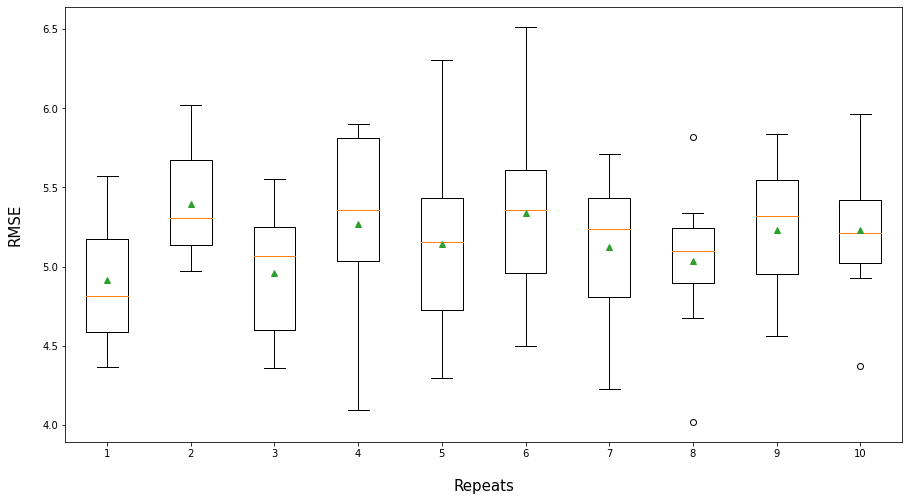

In [10]:
plot_scores_box_plot(scores, repeats, n_splits)

In [11]:
linreg_model = LinearRegression()
index = -98

linreg_model.fit(scaler.fit_transform(x[:index]), y[:index])
y_pred = linreg_model.predict(scaler.transform(x[index:]))
print('RMSE:', mean_squared_error(y_pred, y[index:], squared=False))

RMSE: 5.030611213383246


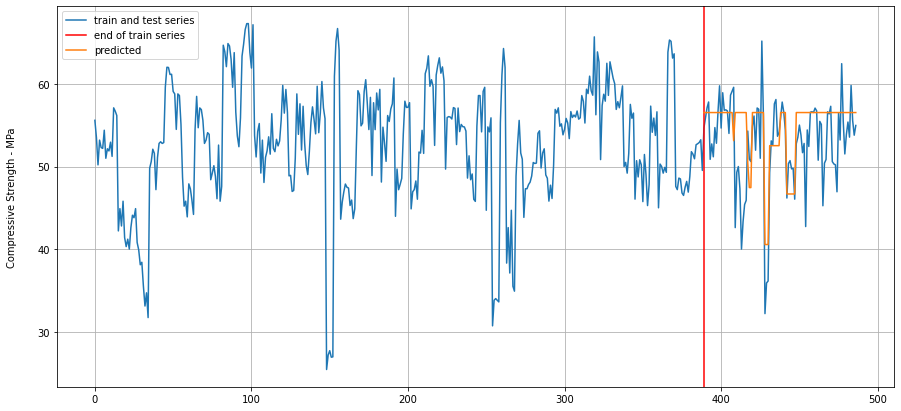

In [12]:
test_series = pd.DataFrame({'ccs28':y})
pred_series = linreg_model.predict(scaler.transform(x))
pred_series = pd.DataFrame({'ccs28-pred' : pred_series})

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))

test_series.plot(ax=ax)
ax.axvline(test_series.index[index], color='r') # end of train dataset
pred_series[index:].plot(ax=ax)
ax.grid(which="both")
ax.legend(["train and test series", "end of train series", 'predicted'], loc="upper left")
ax.set_ylabel('Compressive Strength - MPa', labelpad=20)
plt.show()